# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory ID below

<font size = 5>
2456231

<font size = "5">

Import the "pandas" and "matplotlib.pyplot" library

In [2]:
# Write your answer here:
import pandas as pd
import matplotlib.pyplot as plt

<font size = "5">

(a) Compute function for each individual (map)

<font size = "3">

- Import the datset "data/bmi.csv"
    - **Note that the column `Height` is in $cm$, and `Weight` is in $kg$**
- Write a lambda function for $ BMI = \frac{weight (kg)}{height (m)^2} $
- Use ```list(map(...))``` to calculate $BMI$ for each row of the dataset
- Round the outcome into 2 decimal points
- Store the calculation in a new column in the dataframe called `BMI`
- Display the dataframe


In [37]:
# Write your own code here
bmi = pd.read_csv("data/bmi.csv")
fn_bmi = lambda w, h: w/h**2

bmi["Height"] = bmi["Height"]/100

data = pd.DataFrame()
data["bmi_each"] = list(map(fn_bmi,bmi["Weight"],bmi["Height"]))

data["bmi_each"]

bmi_each = list(map(fn_bmi,bmi["Weight"],bmi["Height"]))
bmi_each

rounded_bmi_each = [round(number, 2) for number in bmi_each]
rounded_bmi_each

bmi['BMI'] = rounded_bmi_each

bmi

,Gender,Height,Weight,Index,BMI
0,Male,1.74,96,4,31.71
1,Male,1.89,87,2,24.36
2,Female,1.85,110,4,32.14
3,Female,1.95,104,3,27.35
4,Male,1.49,61,3,27.48
...,...,...,...,...,...
495,Female,1.50,153,5,68.00
496,Female,1.84,121,4,35.74
497,Female,1.41,136,5,68.41
498,Male,1.50,95,5,42.22


<font size = "5">
For questions (b)-(d), read "data/wdi_2020.csv" <br>

- This is a dataset containing the proportion  <br>
of urban population by country in 2020

In [40]:
dataset = pd.read_csv("data/wdi_2020.csv")
dataset

,year,yearcode,countryname,countrycode,prop_urbanpopulation
0,2020,YR2020,Afghanistan,AFG,26.026000
1,2020,YR2020,Africa Eastern and Southern,AFE,36.828301
2,2020,YR2020,Africa Western and Central,AFW,47.857831
3,2020,YR2020,Albania,ALB,62.112000
4,2020,YR2020,Algeria,DZA,73.733000
...,...,...,...,...,...
261,2020,YR2020,West Bank and Gaza,PSE,76.719000
262,2020,YR2020,World,WLD,56.063764
263,2020,YR2020,"Yemen, Rep.",YEM,37.908000
264,2020,YR2020,Zambia,ZMB,44.629000


<font size = "5">

(b) Convert to upper case

<font size = "3">

- Create the following function to convert a string to upper case

$\quad$ ``` fn_upper = lambda x: x.upper() ```

- Create a new column, "countryname_upper"  <br>
that converts "countryname" to upper case.

- Print the original `countryname` and the newly created column, like: <br>
"['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', ......] "

In [50]:
# Write your own code here
fn_upper = lambda x: x.upper()

countryname_upper = dataset['countryname'].apply(fn_upper)

countryname_list = dataset['countryname'].tolist()

print(countryname_list)
print(countryname_upper)


['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)'

<font size = "5">

(c) Extract sorted elements from a dataset

<font size = "3">

- Sort by "prop_urbanpopulation" in ascending order
- Subset the 5 countries with the lowest urban population

In [56]:
# Write your code here
dataset
asc_urban = dataset.sort_values(by = "prop_urbanpopulation",ascending= True)

asc_urban

display(asc_urban.iloc[0:5,:])

,year,yearcode,countryname,countrycode,prop_urbanpopulation
191,2020,YR2020,Papua New Guinea,PNG,13.345
34,2020,YR2020,Burundi,BDI,13.708
141,2020,YR2020,Liechtenstein,LIE,14.416
177,2020,YR2020,Niger,NER,16.626
149,2020,YR2020,Malawi,MWI,17.427


<font size = "5">

(d) Subset elements with query

<font size = "3">

- Compute the 25 quantile value of "prop_urbanpopulation"
- Use ".query()" to subset countries with <br>
 "prop_urbanpopulation" higher the 25 quantile

**hint: Import ```numpy``` and use `np.nanpercentile`**

In [63]:
# Write your own code here
import numpy as np
quantile_25 = np.nanpercentile(asc_urban['prop_urbanpopulation'], 25) # about 42.49


high_prop_urbanpopulation = asc_urban.query("prop_urbanpopulation > @quantile_25")

high_prop_urbanpopulation

,year,yearcode,countryname,countrycode,prop_urbanpopulation
145,2020,YR2020,Lower middle income,LMC,42.50561
67,2020,YR2020,"Egypt, Arab Rep.",EGY,42.78300
241,2020,YR2020,Togo,TGO,42.80000
163,2020,YR2020,Moldova,MDA,42.84900
211,2020,YR2020,Sierra Leone,SLE,42.92300
...,...,...,...,...,...
171,2020,YR2020,Nauru,NRU,100.00000
90,2020,YR2020,Gibraltar,GIB,100.00000
164,2020,YR2020,Monaco,MCO,100.00000
213,2020,YR2020,Sint Maarten (Dutch part),SXM,100.00000


<font size = "5">

(e) Plot by category

<font size = "3">

- Read "data/wdi_urban.csv"<br>
This contains data from 1980 and 2020

- Create a list with the unique values of "year"
- Create a plot with a ...
    - Histogram of "prop_urbanpopulation" <br>
    for each year
    - Set the histogram option ``` alpha = 0.5 ``` for transparency
    - All the histograms should be overlapping
    - Create a legend with the list of years
    - Label the axes and the title

What do we learn from the graph?

HINT: See the example at the end of Lecture 10


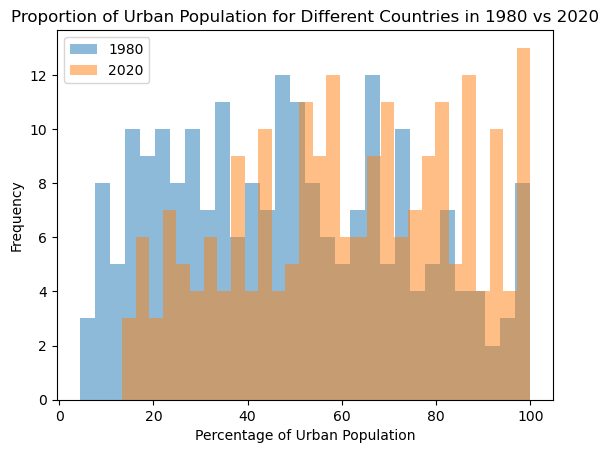

In [88]:
# Write your own code here
dataset2 = pd.read_csv("data/wdi_urban.csv")
dataset2

year_unique = pd.unique(dataset2["year"]).tolist()

data_1980 = dataset2.query("year == 1980")
data_2020 = dataset2.query("year == 2020")

plt.hist(data_1980["prop_urbanpopulation"], bins=30, alpha=0.5)
plt.hist(data_2020["prop_urbanpopulation"], bins=30, alpha=0.5)
plt.legend(labels = ["1980", "2020"])
plt.xlabel("Percentage of Urban Population")
plt.ylabel("Frequency")
plt.title("Proportion of Urban Population for Different Countries in 1980 vs 2020")
plt.show()


<font size = 3>
From the graph, we can see the increase of industrialization and urbanization for many countries. Over the last 40 years, more and more countries have experienced a shift from a substantial rural population to almost complete urbanization. 